In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [37]:
#Load the data set
df=pd.read_csv('crime.csv', encoding = "ISO-8859-1", engine='python')
df

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50,NaN,2/10/2022 3:16,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,7/7/2021 21:02,NaN,7/8/2021 0:55,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30,NaN,10/29/2020 4:31,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,9/6/2018 17:00,9/6/2018 23:00,9/7/2018 9:58,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00,5/8/2020 18:30,5/13/2020 10:00,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,10/3/2023 11:30,10/3/2023 15:00,10/3/2023 17:40,8501 E ALAMEDA AVE,3171584.0,1684914.0,-104.890099,39.712310,3,321,lowry-field,1,0,1
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,9/27/2023 11:00,NaN,10/3/2023 18:34,517 E BAYAUD AVE,3146000.0,1685678.0,-104.981021,39.714843,3,311,speer,1,0,1
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/3/2023 10:44,NaN,10/3/2023 12:03,N JOLIET ST / E 55TH AVE,3179460.0,1715407.0,-104.861343,39.795869,5,511,montbello,1,0,1
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/3/2023 5:30,NaN,10/3/2023 9:47,585 S ALTON WAY,3173405.0,1682706.0,-104.883680,39.706214,3,321,windsor,1,0,1


In [38]:
df['first_occurrence_date']=pd.to_datetime(df['first_occurrence_date']).dt.strftime(date_format = '%m/%d/%Y %H:%M:%S %p')
df['reported_date']=pd.to_datetime(df['reported_date']).dt.strftime(date_format = '%m/%d/%Y %H:%M:%S %p')

In [39]:
df

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,02/10/2022 02:50:00 AM,NaN,02/10/2022 03:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,07/07/2021 21:02:00 PM,NaN,07/08/2021 00:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020 01:30:00 AM,NaN,10/29/2020 04:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,09/06/2018 17:00:00 PM,9/6/2018 23:00,09/07/2018 09:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,05/08/2020 05:00:00 AM,5/8/2020 18:30,05/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,10/03/2023 11:30:00 AM,10/3/2023 15:00,10/03/2023 17:40:00 PM,8501 E ALAMEDA AVE,3171584.0,1684914.0,-104.890099,39.712310,3,321,lowry-field,1,0,1
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,09/27/2023 11:00:00 AM,NaN,10/03/2023 18:34:00 PM,517 E BAYAUD AVE,3146000.0,1685678.0,-104.981021,39.714843,3,311,speer,1,0,1
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023 10:44:00 AM,NaN,10/03/2023 12:03:00 PM,N JOLIET ST / E 55TH AVE,3179460.0,1715407.0,-104.861343,39.795869,5,511,montbello,1,0,1
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023 05:30:00 AM,NaN,10/03/2023 09:47:00 AM,585 S ALTON WAY,3173405.0,1682706.0,-104.883680,39.706214,3,321,windsor,1,0,1


In [40]:
#visualize the top five rows in the data using the head function
df.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,02/10/2022 02:50:00 AM,NaN,02/10/2022 03:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,07/07/2021 21:02:00 PM,NaN,07/08/2021 00:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020 01:30:00 AM,NaN,10/29/2020 04:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,09/06/2018 17:00:00 PM,9/6/2018 23:00,09/07/2018 09:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,05/08/2020 05:00:00 AM,5/8/2020 18:30,05/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1


In [41]:
#drop unwanted columns
ds=df.drop(["incident_address","is_crime","is_traffic","victim_count"],axis=1)
#visualize again
ds.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,02/10/2022 02:50:00 AM,NaN,02/10/2022 03:16:00 AM,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,07/07/2021 21:02:00 PM,NaN,07/08/2021 00:55:00 AM,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020 01:30:00 AM,NaN,10/29/2020 04:31:00 AM,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,09/06/2018 17:00:00 PM,9/6/2018 23:00,09/07/2018 09:58:00 AM,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,05/08/2020 05:00:00 AM,5/8/2020 18:30,05/13/2020 10:00:00 AM,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello


In [42]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386865 entries, 0 to 386864
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             386865 non-null  float64
 1   offense_id              386865 non-null  float64
 2   offense_code            386865 non-null  int64  
 3   offense_code_extension  386865 non-null  int64  
 4   offense_type_id         386865 non-null  object 
 5   offense_category_id     386865 non-null  object 
 6   first_occurrence_date   386865 non-null  object 
 7   last_occurrence_date    211309 non-null  object 
 8   reported_date           386865 non-null  object 
 9   geo_x                   371362 non-null  float64
 10  geo_y                   371362 non-null  float64
 11  geo_lon                 371096 non-null  float64
 12  geo_lat                 371096 non-null  float64
 13  district_id             386808 non-null  object 
 14  precinct_id         

## Cleaning

In [43]:
#Checking the null values in the data 
ds.isna().sum().sort_values(ascending=False)

last_occurrence_date      175556
geo_lon                    15769
geo_lat                    15769
geo_x                      15503
geo_y                      15503
neighborhood_id              689
district_id                   57
incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
reported_date                  0
precinct_id                    0
dtype: int64

In [44]:
#ds.loc[(ds['geo_lon'] == '') and (ds['geo_lat'] == '')]
ds.loc[pd.isna(ds['geo_lon'])==True]

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id
49366,2.022190e+09,2.022190e+15,3601,1,sex-aslt-fondle-adult-victim,sexual-assault,04/08/2022 00:00:00 AM,4/17/2022 10:00,04/17/2022 10:16:00 AM,NaN,NaN,NaN,NaN,4,423,fort-logan
49367,2.018714e+09,2.018710e+15,3601,1,sex-aslt-fondle-adult-victim,sexual-assault,10/18/2018 01:00:00 AM,10/18/2018 2:00,10/18/2018 16:34:00 PM,NaN,NaN,NaN,NaN,6,622,city-park-west
49368,2.022500e+10,2.022500e+16,3601,1,sex-aslt-fondle-adult-victim,sexual-assault,08/02/2022 12:00:00 PM,NaN,08/03/2022 14:39:00 PM,NaN,NaN,NaN,NaN,2,222,montclair
49369,2.020297e+09,2.020300e+15,3601,1,sex-aslt-fondle-adult-victim,sexual-assault,05/14/2020 12:00:00 PM,5/14/2020 12:07,05/14/2020 14:04:00 PM,NaN,NaN,NaN,NaN,3,311,baker
49370,2.018438e+09,2.018440e+15,3601,1,sex-aslt-fondle-adult-victim,sexual-assault,06/29/2018 22:00:00 PM,NaN,06/29/2018 22:09:00 PM,NaN,NaN,NaN,NaN,1,123,lincoln-park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386710,2.023532e+09,2.023530e+15,1313,2,assault-dv,other-crimes-against-persons,10/02/2023 19:15:00 PM,10/2/2023 19:21,10/02/2023 19:21:00 PM,NaN,NaN,NaN,NaN,6,621,five-points
386711,2.023510e+09,2.023510e+15,1313,2,assault-dv,other-crimes-against-persons,09/21/2023 10:00:00 AM,9/21/2023 11:00,09/21/2023 23:09:00 PM,NaN,NaN,NaN,NaN,3,322,washington-virginia-vale
386714,2.023534e+09,2.023530e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/03/2023 16:07:00 PM,NaN,10/03/2023 17:37:00 PM,NaN,NaN,NaN,NaN,4,423,harvey-park-south
386715,2.023533e+09,2.023530e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/03/2023 08:43:00 AM,NaN,10/03/2023 11:10:00 AM,NaN,NaN,NaN,NaN,2,211,whittier


In [45]:
ds['precinct_id'].value_counts()

611    25940
612    19328
311    17117
621    16078
323    13990
623    13671
211    12415
512    12251
122    11753
123    11633
322    11362
522    10911
622    10894
412    10805
423    10470
223    10440
313    10317
321    10286
113     9955
121     9676
521     9331
111     9316
759     9186
312     8903
422     8732
221     8573
222     8250
324     8165
421     8063
511     7837
411     7795
212     7346
213     7047
314     6747
112     6547
523     5199
999      525
436        8
316        1
532        1
232        1
Name: precinct_id, dtype: int64

In [46]:
ds.loc[pd.isna(ds['district_id'])==True]

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id
33153,2.018601e+10,2.018600e+16,2999,2,criminal-mischief-graffiti,public-disorder,10/01/2018 09:00:00 AM,10/1/2018 11:20,10/01/2018 11:25:00 AM,3165069.0,1698522.0,-1.049129e+02,39.749784,NaN,999,south-park-hill
38606,2.018214e+09,2.018210e+15,3532,0,drug-cocaine-possess,drug-alcohol,03/31/2018 22:49:00 PM,NaN,03/31/2018 22:49:00 PM,3129529.0,1699824.0,-1.050393e+02,39.753920,NaN,999,sloan-lake
43483,2.022171e+09,2.022170e+15,3571,0,drug-methampetamine-sell,drug-alcohol,06/01/2019 09:00:00 AM,10/8/2020 13:03,04/07/2022 09:00:00 AM,40674766.0,10890452.0,5.000000e-07,0.000000,NaN,999,NaN
64411,2.021106e+09,2.021110e+15,5203,0,weapon-carrying-prohibited,all-other-crimes,02/21/2021 17:10:00 PM,NaN,02/21/2021 17:10:00 PM,3147697.0,1688991.0,-1.049749e+02,39.723911,NaN,999,speer
65451,2.020230e+09,2.020230e+15,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,04/16/2020 16:39:00 PM,NaN,04/16/2020 19:26:00 PM,3167637.0,1708927.0,-1.049036e+02,39.778301,NaN,999,northeast-park-hill
67200,2.018583e+08,2.018580e+14,5213,0,weapon-unlawful-discharge-of,all-other-crimes,01/25/2018 00:35:00 AM,NaN,01/25/2018 00:50:00 AM,3148067.0,1700432.0,-1.049734e+02,39.755313,NaN,999,five-points
68833,2.019577e+08,2.019580e+14,5213,0,weapon-unlawful-discharge-of,all-other-crimes,01/25/2019 23:33:00 PM,NaN,01/26/2019 00:09:00 AM,40674765.0,10890451.0,-2.400000e-06,0.000001,NaN,999,NaN
86564,2.021106e+09,2.021110e+15,5707,0,criminal-trespassing,all-other-crimes,02/21/2021 17:10:00 PM,NaN,02/21/2021 17:10:00 PM,3147697.0,1688991.0,-1.049749e+02,39.723911,NaN,999,speer
98835,2.019183e+09,2.019180e+15,1102,0,sex-aslt-rape,sexual-assault,03/23/2019 15:00:00 PM,NaN,03/23/2019 15:09:00 PM,NaN,NaN,NaN,NaN,NaN,999,lowry-field
98922,2.020112e+09,2.020110e+15,1102,0,sex-aslt-rape,sexual-assault,02/20/2020 22:50:00 PM,2/21/2020 3:30,02/21/2020 04:30:00 AM,NaN,NaN,NaN,NaN,NaN,999,mar-lee


In [47]:
ds.loc[ds['precinct_id']==999]

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id
2199,2.021602e+10,2.021600e+16,2999,0,criminal-mischief-other,public-disorder,08/29/2021 00:15:00 AM,8/29/2021 0:20,08/30/2021 16:47:00 PM,3082712.0,1667296.0,-105.206197,39.665157,U,999,NaN
4285,2.018352e+09,2.018350e+15,2999,0,criminal-mischief-other,public-disorder,05/25/2018 22:25:00 PM,5/25/2018 22:25,05/25/2018 22:25:00 PM,3082712.0,1667296.0,-105.206197,39.665157,U,999,NaN
6096,2.020467e+09,2.020470e+15,2999,0,criminal-mischief-other,public-disorder,08/02/2020 15:45:00 PM,NaN,08/02/2020 18:45:00 PM,3117828.0,1666589.0,-105.081474,39.662838,U,999,NaN
9748,2.021644e+09,2.021640e+15,2999,0,criminal-mischief-other,public-disorder,11/12/2021 16:40:00 PM,11/13/2021 4:10,11/13/2021 04:40:00 AM,3182316.0,1700526.0,-104.851557,39.754963,U,999,central-park
10958,2.022491e+09,2.022490e+15,2999,0,criminal-mischief-other,public-disorder,09/22/2022 17:00:00 PM,9/23/2022 7:00,09/23/2022 08:33:00 AM,3123442.0,1710689.0,-105.060775,39.783829,U,999,regis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384163,2.023602e+10,2.023600e+16,2308,0,theft-from-bldg,larceny,09/19/2023 20:00:00 PM,9/19/2023 23:00,09/20/2023 15:11:00 PM,3082712.0,1667296.0,-105.206197,39.665157,U,999,NaN
385363,2.023515e+09,2.023520e+15,1102,0,sex-aslt-rape,sexual-assault,09/24/2023 04:14:00 AM,NaN,09/24/2023 04:14:00 AM,NaN,NaN,NaN,NaN,U,999,NaN
386329,2.023529e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,09/25/2023 22:00:00 PM,9/30/2023 22:55,09/30/2023 23:54:00 PM,3159904.0,1679763.0,-104.931730,39.698377,U,999,NaN
386419,2.023532e+09,2.023530e+15,5202,0,weapon-carrying-concealed,all-other-crimes,10/02/2023 17:27:00 PM,NaN,10/02/2023 20:03:00 PM,3136055.0,1713391.0,-105.015846,39.791071,U,999,chaffee-park


In [48]:
ds['district_id'].value_counts()

3    86888
6    85911
1    58880
2    54072
4    45873
5    45530
7     9186
U      468
Name: district_id, dtype: int64

In [49]:
ds['district_id']=ds['district_id'].replace(to_replace='U', value='0')
ds['district_id'].fillna('0', inplace=True)
ds['district_id'] = ds['district_id'].astype(int)
ds['district_id'].value_counts()
ds.isna().sum().sort_values(ascending=False)
#district_id done. Noticed that author used U for unknown and changed all U and Nan to district 0 to be able to change to int

last_occurrence_date      175556
geo_lon                    15769
geo_lat                    15769
geo_x                      15503
geo_y                      15503
neighborhood_id              689
incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
reported_date                  0
district_id                    0
precinct_id                    0
dtype: int64

In [50]:
ds['neighborhood_id'].value_counts()
#noticed that there's 78 different neighborhoods. Too unnecessarily complicated to be used for my purposes. 
#Decided to drop neighborhood_id here.
ds=ds.drop(['neighborhood_id'],axis=1)
#visualize again
ds.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,02/10/2022 02:50:00 AM,NaN,02/10/2022 03:16:00 AM,3140929.0,1692612.0,-104.998910,39.733957,1,123
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,07/07/2021 21:02:00 PM,NaN,07/08/2021 00:55:00 AM,3142470.0,1697098.0,-104.993342,39.746248,6,611
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020 01:30:00 AM,NaN,10/29/2020 04:31:00 AM,3133352.0,1710396.0,-105.025520,39.782888,1,111
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,09/06/2018 17:00:00 PM,9/6/2018 23:00,09/07/2018 09:58:00 AM,3133534.0,1685797.0,-105.025330,39.715357,4,411
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,05/08/2020 05:00:00 AM,5/8/2020 18:30,05/13/2020 10:00:00 AM,3184065.0,1710782.0,-104.845074,39.783082,5,521


## Separating first_occurrence_date (fid), last_occurrence_date (lod) [dropped], reported_date (rd) into separate parts of date, time, part for ease of processing later

In [51]:
ds['1']=ds['first_occurrence_date'].str.split(' ')
ds[['1','2','3']] = pd.DataFrame(ds['1'].tolist(), index= ds.index)
ds['fid_time']=ds['2']
ds['fid']=ds['1']
ds['fid_part']=ds['3']
ds=ds.drop(['1','2','3'],axis=1)
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,fid_time,fid,fid_part
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,02/10/2022 02:50:00 AM,NaN,02/10/2022 03:16:00 AM,3140929.0,1692612.0,-104.998910,39.733957,1,123,02:50:00,02/10/2022,AM
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,07/07/2021 21:02:00 PM,NaN,07/08/2021 00:55:00 AM,3142470.0,1697098.0,-104.993342,39.746248,6,611,21:02:00,07/07/2021,PM
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020 01:30:00 AM,NaN,10/29/2020 04:31:00 AM,3133352.0,1710396.0,-105.025520,39.782888,1,111,01:30:00,10/29/2020,AM
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,09/06/2018 17:00:00 PM,9/6/2018 23:00,09/07/2018 09:58:00 AM,3133534.0,1685797.0,-105.025330,39.715357,4,411,17:00:00,09/06/2018,PM
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,05/08/2020 05:00:00 AM,5/8/2020 18:30,05/13/2020 10:00:00 AM,3184065.0,1710782.0,-104.845074,39.783082,5,521,05:00:00,05/08/2020,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,10/03/2023 11:30:00 AM,10/3/2023 15:00,10/03/2023 17:40:00 PM,3171584.0,1684914.0,-104.890099,39.712310,3,321,11:30:00,10/03/2023,AM
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,09/27/2023 11:00:00 AM,NaN,10/03/2023 18:34:00 PM,3146000.0,1685678.0,-104.981021,39.714843,3,311,11:00:00,09/27/2023,AM
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023 10:44:00 AM,NaN,10/03/2023 12:03:00 PM,3179460.0,1715407.0,-104.861343,39.795869,5,511,10:44:00,10/03/2023,AM
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023 05:30:00 AM,NaN,10/03/2023 09:47:00 AM,3173405.0,1682706.0,-104.883680,39.706214,3,321,05:30:00,10/03/2023,AM


In [52]:
ds.columns

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'geo_x', 'geo_y', 'geo_lon',
       'geo_lat', 'district_id', 'precinct_id', 'fid_time', 'fid', 'fid_part'],
      dtype='object')

In [53]:
ds=ds[['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
'offense_type_id', 'offense_category_id', 'first_occurrence_date', 'fid','fid_time', 'fid_part', 
       'reported_date', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id']]
ds=ds.drop(['first_occurrence_date'],axis=1)

In [510]:
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022,2:50:00,AM,2/10/2022 3:16:00 AM,3140929.0,1692612.0,-104.998910,39.733957,1,123
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021,9:02:00,PM,7/8/2021 12:55:00 AM,3142470.0,1697098.0,-104.993342,39.746248,6,611
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020,1:30:00,AM,10/29/2020 4:31:00 AM,3133352.0,1710396.0,-105.025520,39.782888,1,111
3,2018612468,2018612468299900,2999,0,criminal-mischief-other,public-disorder,9/6/2018,5:00:00,PM,9/7/2018 9:58:00 AM,3133534.0,1685797.0,-105.025330,39.715357,4,411
4,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020,5:00:00,AM,5/13/2020 10:00:00 AM,3184065.0,1710782.0,-104.845074,39.783082,5,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2023534182,2023534182240400,2404,0,theft-of-motor-vehicle,auto-theft,10/3/2023,11:30:00,AM,10/3/2023 5:40:00 PM,3171584.0,1684914.0,-104.890099,39.712310,3,321
386861,2023534279,2023534279260900,2609,0,fraud-by-use-of-computer,white-collar-crime,9/27/2023,11:00:00,AM,10/3/2023 6:34:00 PM,3146000.0,1685678.0,-104.981021,39.714843,3,311
386862,2023533509,2023533509131506,1315,6,agg-aslt-shoot,aggravated-assault,10/3/2023,10:44:00,AM,10/3/2023 12:03:00 PM,3179460.0,1715407.0,-104.861343,39.795869,5,511
386863,2023533048,2023533048131506,1315,6,agg-aslt-shoot,aggravated-assault,10/3/2023,5:30:00,AM,10/3/2023 9:47:00 AM,3173405.0,1682706.0,-104.883680,39.706214,3,321


In [54]:
#decide to drop last_occurrence_date as I don't want to remove that big of a chunk of my data and I also don't want the hassle
#to clean it, there's no good value to put in for empty values as there's not enough knowledge available for me to know what 
#the empty values meant. Tried researching it, can't come up with a good answer. Wanted to put current date time, but then need 
#a function to continually update current time. Don't really makes sense
ds=ds.drop(['last_occurrence_date'],axis=1)

KeyError: "['last_occurrence_date'] not found in axis"

In [55]:
ds=ds.drop(['incident_address'],axis=1)

KeyError: "['incident_address'] not found in axis"

In [56]:
ds.isna().sum().sort_values(ascending=False)

geo_lon                   15769
geo_lat                   15769
geo_x                     15503
geo_y                     15503
incident_id                   0
offense_id                    0
offense_code                  0
offense_code_extension        0
offense_type_id               0
offense_category_id           0
fid                           0
fid_time                      0
fid_part                      0
reported_date                 0
district_id                   0
precinct_id                   0
dtype: int64

In [57]:
ds=ds.drop(['precinct_id'],axis=1)

In [58]:
#Starting the cleaning of district_id==0
d0_mean= ds[(pd.isna(ds['geo_lat'])==False) & (ds['district_id']==0)].mean()
d0_mean

incident_id               3.370234e+09
offense_id                3.370233e+15
offense_code              3.553901e+03
offense_code_extension    3.827160e-01
geo_x                     3.597037e+06
geo_y                     1.794088e+06
geo_lon                  -1.037287e+02
geo_lat                   3.921028e+01
district_id               0.000000e+00
dtype: float64

In [515]:
d0_geolat=d0_mean['geo_lat']
d0_geox=d0_mean['geo_x']
d0_geoy=d0_mean['geo_y']
d0_geolon=d0_mean['geo_lon']

In [516]:
ds.columns

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'fid', 'fid_time', 'fid_part',
       'reported_date', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat', 'district_id'],
      dtype='object')

In [517]:
dd=ds.drop(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'fid', 'fid_time', 'fid_part',
       'reported_date', 'geo_x', 'geo_y', 'geo_lon'],axis=1)
dd.iloc[2].isna()==True

geo_lat        False
district_id    False
Name: 2, dtype: bool

In [475]:
#need help. I want to make it so that I am putting in the approximated values of locators approximated from each district_id
#it would have been better to use the precinct but it's too big. Somehow, not able to limit the NaNs to be filled to be just
#the ones with district_id==0. The method used below outputs a dataset => need to select just the geo_lat.
#[(pd.isna(ds['geo_lat'])==True) & (ds['district_id']==0)]['geo_lat'].fillna(d0_geolat,inplace=True)
#map(lambda ds.geo_lat.isna()==True & (ds['district_id']==0): fillna(d0_geolat,inplace=True), ds['geo_lat'])
for i in range(0,386865):
    if (dd.iloc[i].isna().any()==True) & (dd.district_id.iloc[i]==0):
        dd.iloc[i].fillna(d0_geolat, inplace=True)

KeyboardInterrupt: 

In [ ]:
#checked no null
dd[(pd.isna(dd['geo_lat'])==True) & (dd['district_id']==0)]

In [ ]:
dd=ds.drop(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'fid', 'fid_time', 'fid_part',
       'reported_date', 'geo_x', 'geo_y', 'geo_lat'],axis=1)
dd

In [ ]:
for i in range(0,386865):
    if (dd.iloc[i].isna().any()==True) & (dd.district_id.iloc[i]==0):
        dd.iloc[i].fillna(d0_geolon, inplace=True)

In [ ]:
(dd.iloc[50318].isna().any()==True) & (dd.district_id.iloc[50318]==0)

In [518]:
dd[(pd.isna(dd['geo_lon'])==True) & (dd['district_id']==0)]
#after the upteenth time of attempting to fix this 'bug' where it clearly says that the boolean function outputs True so it should
#do what I asked it to do, but it clearly didn't when we checked I decided to dropna. 

KeyError: 'geo_lon'

In [59]:
ds=ds.dropna()
ds.isna().sum().sort_values(ascending=False)

incident_id               0
offense_id                0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
fid                       0
fid_time                  0
fid_part                  0
reported_date             0
geo_x                     0
geo_y                     0
geo_lon                   0
geo_lat                   0
district_id               0
dtype: int64

In [60]:
ds['1']=ds['reported_date'].str.split(' ')
ds[['1','2','3']] = pd.DataFrame(ds['1'].tolist(), index= ds.index)
ds['rd_time']=ds['2']
ds['rd']=ds['1']
ds['rd_part']=ds['3']
ds=ds.drop(['1','2','3'],axis=1)
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,reported_date,geo_x,geo_y,geo_lon,geo_lat,district_id,rd_time,rd,rd_part
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,02/10/2022,02:50:00,AM,02/10/2022 03:16:00 AM,3140929.0,1692612.0,-104.998910,39.733957,1,03:16:00,02/10/2022,AM
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,07/07/2021,21:02:00,PM,07/08/2021 00:55:00 AM,3142470.0,1697098.0,-104.993342,39.746248,6,00:55:00,07/08/2021,AM
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020,01:30:00,AM,10/29/2020 04:31:00 AM,3133352.0,1710396.0,-105.025520,39.782888,1,04:31:00,10/29/2020,AM
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,09/06/2018,17:00:00,PM,09/07/2018 09:58:00 AM,3133534.0,1685797.0,-105.025330,39.715357,4,09:58:00,09/07/2018,AM
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,05/08/2020,05:00:00,AM,05/13/2020 10:00:00 AM,3184065.0,1710782.0,-104.845074,39.783082,5,10:00:00,05/13/2020,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,10/03/2023,11:30:00,AM,10/03/2023 17:40:00 PM,3171584.0,1684914.0,-104.890099,39.712310,3,17:40:00,10/03/2023,PM
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,09/27/2023,11:00:00,AM,10/03/2023 18:34:00 PM,3146000.0,1685678.0,-104.981021,39.714843,3,18:34:00,10/03/2023,PM
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023,10:44:00,AM,10/03/2023 12:03:00 PM,3179460.0,1715407.0,-104.861343,39.795869,5,12:03:00,10/03/2023,PM
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023,05:30:00,AM,10/03/2023 09:47:00 AM,3173405.0,1682706.0,-104.883680,39.706214,3,09:47:00,10/03/2023,AM


In [61]:
ds=ds[['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
'offense_type_id', 'offense_category_id', 'fid','fid_time', 'fid_part', 
       'rd','rd_time','rd_part', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id']]
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,rd,rd_time,rd_part,geo_x,geo_y,geo_lon,geo_lat,district_id
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,02/10/2022,02:50:00,AM,02/10/2022,03:16:00,AM,3140929.0,1692612.0,-104.998910,39.733957,1
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,07/07/2021,21:02:00,PM,07/08/2021,00:55:00,AM,3142470.0,1697098.0,-104.993342,39.746248,6
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020,01:30:00,AM,10/29/2020,04:31:00,AM,3133352.0,1710396.0,-105.025520,39.782888,1
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,09/06/2018,17:00:00,PM,09/07/2018,09:58:00,AM,3133534.0,1685797.0,-105.025330,39.715357,4
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,05/08/2020,05:00:00,AM,05/13/2020,10:00:00,AM,3184065.0,1710782.0,-104.845074,39.783082,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,10/03/2023,11:30:00,AM,10/03/2023,17:40:00,PM,3171584.0,1684914.0,-104.890099,39.712310,3
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,09/27/2023,11:00:00,AM,10/03/2023,18:34:00,PM,3146000.0,1685678.0,-104.981021,39.714843,3
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023,10:44:00,AM,10/03/2023,12:03:00,PM,3179460.0,1715407.0,-104.861343,39.795869,5
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,10/03/2023,05:30:00,AM,10/03/2023,09:47:00,AM,3173405.0,1682706.0,-104.883680,39.706214,3


## Creating new column for fid_day and rd_day that shows name of day

In [62]:
ds['fid'] = pd.to_datetime(ds['fid'])
ds['fid_day']=ds['fid'].dt.day_name()
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,rd,rd_time,rd_part,geo_x,geo_y,geo_lon,geo_lat,district_id,fid_day
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,2022-02-10,02:50:00,AM,02/10/2022,03:16:00,AM,3140929.0,1692612.0,-104.998910,39.733957,1,Thursday
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,2021-07-07,21:02:00,PM,07/08/2021,00:55:00,AM,3142470.0,1697098.0,-104.993342,39.746248,6,Wednesday
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,2020-10-29,01:30:00,AM,10/29/2020,04:31:00,AM,3133352.0,1710396.0,-105.025520,39.782888,1,Thursday
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,2018-09-06,17:00:00,PM,09/07/2018,09:58:00,AM,3133534.0,1685797.0,-105.025330,39.715357,4,Thursday
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,2020-05-08,05:00:00,AM,05/13/2020,10:00:00,AM,3184065.0,1710782.0,-104.845074,39.783082,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,2023-10-03,11:30:00,AM,10/03/2023,17:40:00,PM,3171584.0,1684914.0,-104.890099,39.712310,3,Tuesday
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,2023-09-27,11:00:00,AM,10/03/2023,18:34:00,PM,3146000.0,1685678.0,-104.981021,39.714843,3,Wednesday
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,10:44:00,AM,10/03/2023,12:03:00,PM,3179460.0,1715407.0,-104.861343,39.795869,5,Tuesday
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,05:30:00,AM,10/03/2023,09:47:00,AM,3173405.0,1682706.0,-104.883680,39.706214,3,Tuesday


In [63]:
ds['rd'] = pd.to_datetime(ds['rd'])
ds['rd_day']=ds['rd'].dt.day_name()
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,rd,rd_time,rd_part,geo_x,geo_y,geo_lon,geo_lat,district_id,fid_day,rd_day
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,2022-02-10,02:50:00,AM,2022-02-10,03:16:00,AM,3140929.0,1692612.0,-104.998910,39.733957,1,Thursday,Thursday
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,2021-07-07,21:02:00,PM,2021-07-08,00:55:00,AM,3142470.0,1697098.0,-104.993342,39.746248,6,Wednesday,Thursday
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,2020-10-29,01:30:00,AM,2020-10-29,04:31:00,AM,3133352.0,1710396.0,-105.025520,39.782888,1,Thursday,Thursday
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,2018-09-06,17:00:00,PM,2018-09-07,09:58:00,AM,3133534.0,1685797.0,-105.025330,39.715357,4,Thursday,Friday
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,2020-05-08,05:00:00,AM,2020-05-13,10:00:00,AM,3184065.0,1710782.0,-104.845074,39.783082,5,Friday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,2023-10-03,11:30:00,AM,2023-10-03,17:40:00,PM,3171584.0,1684914.0,-104.890099,39.712310,3,Tuesday,Tuesday
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,2023-09-27,11:00:00,AM,2023-10-03,18:34:00,PM,3146000.0,1685678.0,-104.981021,39.714843,3,Wednesday,Tuesday
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,10:44:00,AM,2023-10-03,12:03:00,PM,3179460.0,1715407.0,-104.861343,39.795869,5,Tuesday,Tuesday
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,05:30:00,AM,2023-10-03,09:47:00,AM,3173405.0,1682706.0,-104.883680,39.706214,3,Tuesday,Tuesday


In [64]:
ds=ds[['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'fid', 'fid_time', 'fid_part','fid_day',
       'rd','rd_time','rd_part','rd_day', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat', 'district_id']]
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,fid_day,rd,rd_time,rd_part,rd_day,geo_x,geo_y,geo_lon,geo_lat,district_id
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,2022-02-10,02:50:00,AM,Thursday,2022-02-10,03:16:00,AM,Thursday,3140929.0,1692612.0,-104.998910,39.733957,1
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,2021-07-07,21:02:00,PM,Wednesday,2021-07-08,00:55:00,AM,Thursday,3142470.0,1697098.0,-104.993342,39.746248,6
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,2020-10-29,01:30:00,AM,Thursday,2020-10-29,04:31:00,AM,Thursday,3133352.0,1710396.0,-105.025520,39.782888,1
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,2018-09-06,17:00:00,PM,Thursday,2018-09-07,09:58:00,AM,Friday,3133534.0,1685797.0,-105.025330,39.715357,4
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,2020-05-08,05:00:00,AM,Friday,2020-05-13,10:00:00,AM,Wednesday,3184065.0,1710782.0,-104.845074,39.783082,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,2023-10-03,11:30:00,AM,Tuesday,2023-10-03,17:40:00,PM,Tuesday,3171584.0,1684914.0,-104.890099,39.712310,3
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,2023-09-27,11:00:00,AM,Wednesday,2023-10-03,18:34:00,PM,Tuesday,3146000.0,1685678.0,-104.981021,39.714843,3
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,10:44:00,AM,Tuesday,2023-10-03,12:03:00,PM,Tuesday,3179460.0,1715407.0,-104.861343,39.795869,5
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,05:30:00,AM,Tuesday,2023-10-03,09:47:00,AM,Tuesday,3173405.0,1682706.0,-104.883680,39.706214,3


## EDA starts

In [66]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371096 entries, 0 to 386864
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             371096 non-null  float64       
 1   offense_id              371096 non-null  float64       
 2   offense_code            371096 non-null  int64         
 3   offense_code_extension  371096 non-null  int64         
 4   offense_type_id         371096 non-null  object        
 5   offense_category_id     371096 non-null  object        
 6   fid                     371096 non-null  datetime64[ns]
 7   fid_time                371096 non-null  object        
 8   fid_part                371096 non-null  object        
 9   fid_day                 371096 non-null  object        
 10  rd                      371096 non-null  datetime64[ns]
 11  rd_time                 371096 non-null  object        
 12  rd_part                 371096

In [67]:
ds.describe()

,incident_id,offense_id,offense_code,offense_code_extension,geo_x,geo_y,geo_lon,geo_lat,district_id
count,3.710960e+05,3.710960e+05,371096.000000,371096.000000,3.710960e+05,3.710960e+05,3.710960e+05,371096.000000,371096.000000
mean,6.312240e+09,6.312237e+15,2802.745273,0.229154,3.157515e+06,1.693963e+06,-1.049429e+02,39.730607,3.669166
std,1.275594e+10,1.275593e+16,1212.849290,0.637943,3.853012e+05,9.561615e+04,1.078909e+00,0.409652,1.814902
min,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.110000e+02,-1.154641e+02,0.000000,0.000000
25%,2.019379e+09,2.019380e+15,2304.000000,0.000000,3.140207e+06,1.683469e+06,-1.050014e+02,39.708748,2.000000
50%,2.021510e+09,2.021510e+15,2399.000000,0.000000,3.146509e+06,1.694853e+06,-1.049790e+02,39.739995,3.000000
75%,2.023502e+09,2.023500e+15,2999.000000,0.000000,3.165779e+06,1.702456e+06,-1.049110e+02,39.760928,5.000000
max,2.020890e+12,2.020890e+18,7399.000000,6.000000,4.067477e+07,1.089045e+07,5.000000e-07,39.900961,7.000000


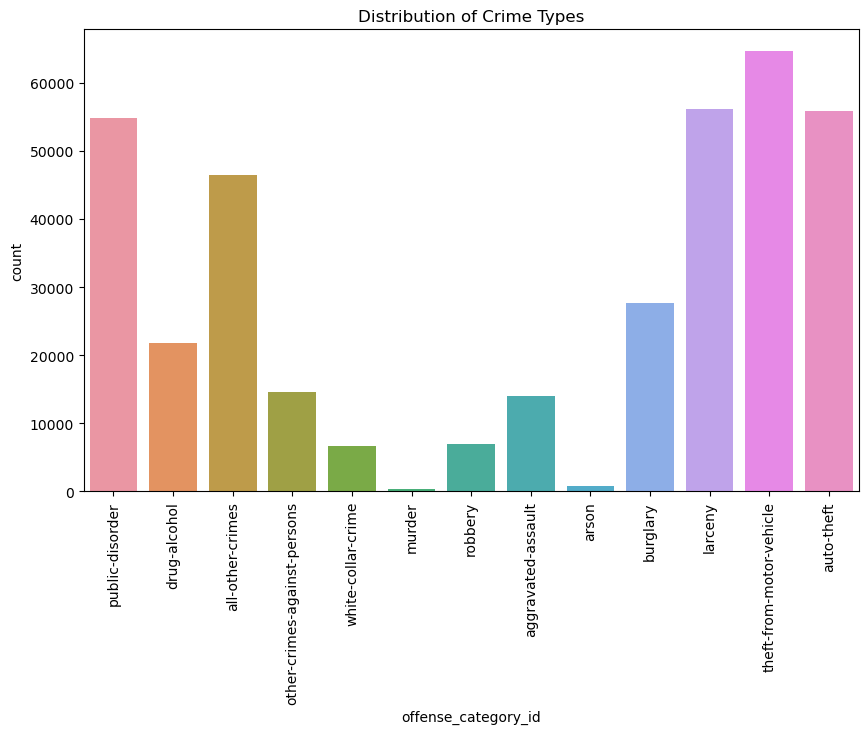

In [68]:
# Visualizing the distribution of the different crime types
plt.figure(figsize=(10, 6))
sns.countplot(x='offense_category_id', data=ds)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.show()

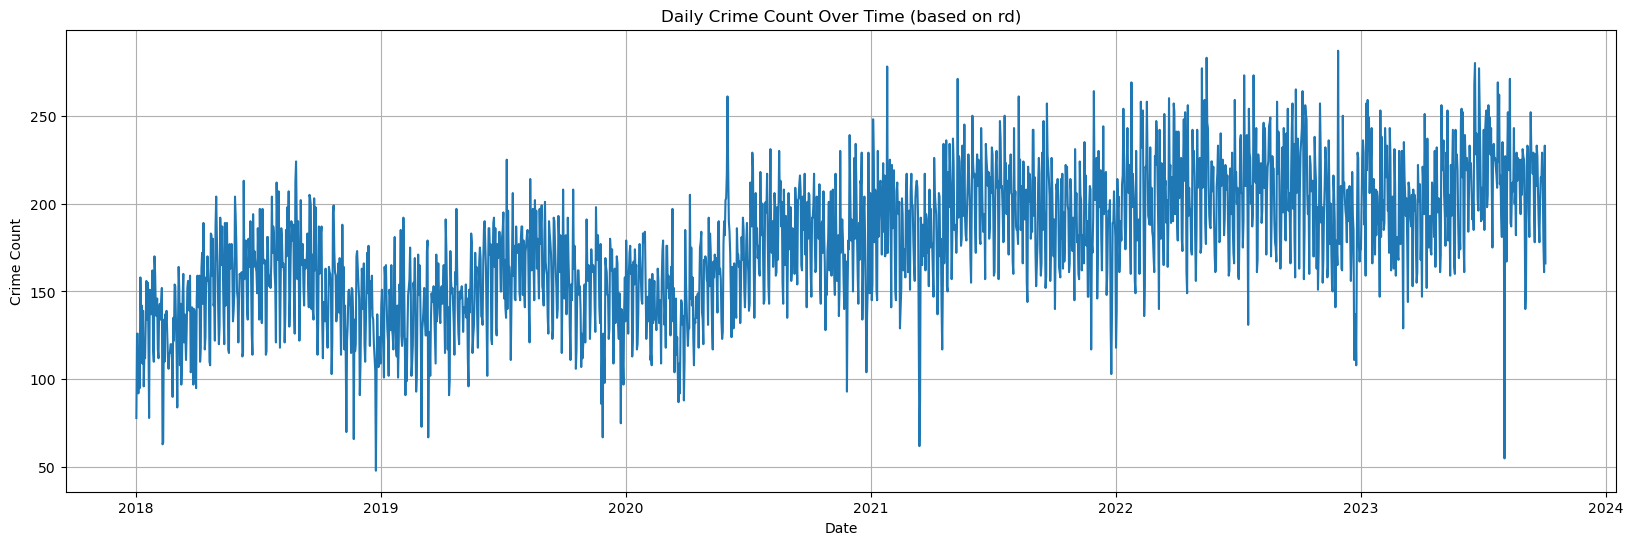

In [69]:
crime_ds=ds.copy()
crime_ds.set_index('rd', inplace=True)

daily_crime_count = crime_ds.resample('D').size()

#daily_crime_count = crime_ds["fid"].value_counts().size()
 
plt.figure(figsize=(20, 6))
plt.plot(daily_crime_count)
plt.title('Daily Crime Count Over Time (based on rd)')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()

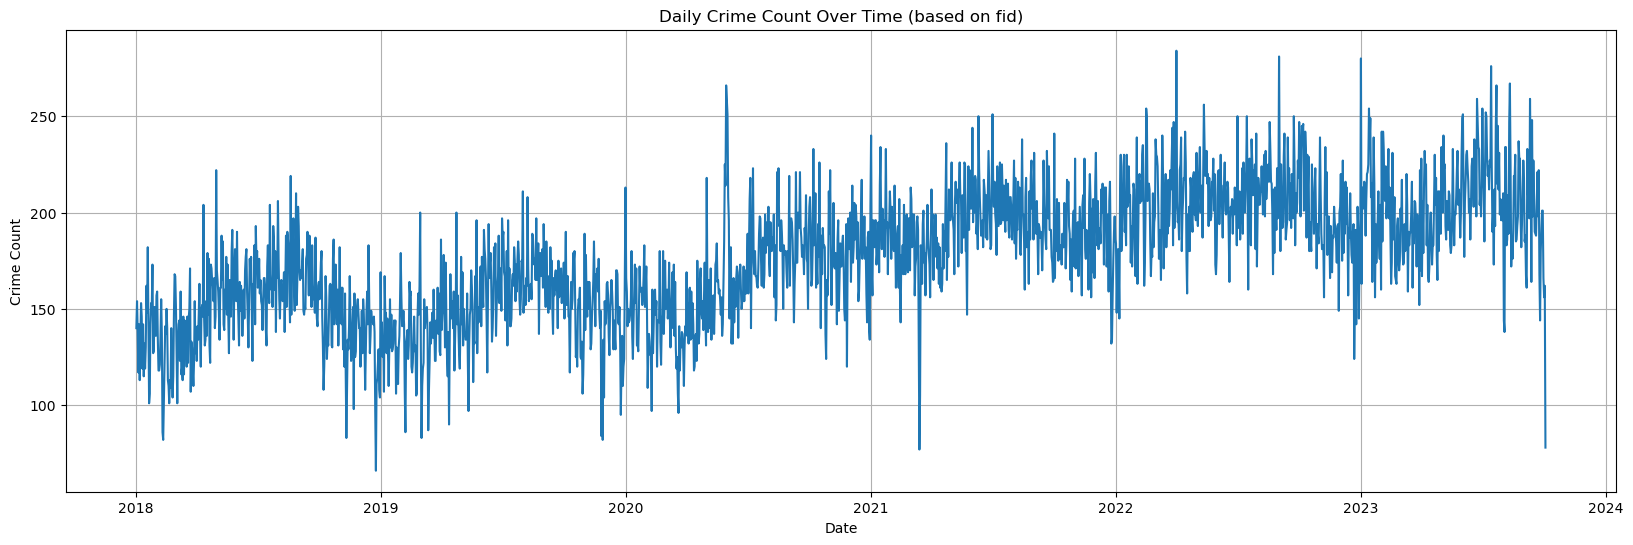

In [70]:
crime_ds=ds.copy()
crime_ds.set_index('fid', inplace=True)

daily_crime_count = crime_ds.resample('D').size()

plt.figure(figsize=(20, 6))
plt.plot(daily_crime_count)
plt.title('Daily Crime Count Over Time (based on fid)')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()

In [71]:
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,fid_day,rd,rd_time,rd_part,rd_day,geo_x,geo_y,geo_lon,geo_lat,district_id
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,2022-02-10,02:50:00,AM,Thursday,2022-02-10,03:16:00,AM,Thursday,3140929.0,1692612.0,-104.998910,39.733957,1
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,2021-07-07,21:02:00,PM,Wednesday,2021-07-08,00:55:00,AM,Thursday,3142470.0,1697098.0,-104.993342,39.746248,6
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,2020-10-29,01:30:00,AM,Thursday,2020-10-29,04:31:00,AM,Thursday,3133352.0,1710396.0,-105.025520,39.782888,1
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,2018-09-06,17:00:00,PM,Thursday,2018-09-07,09:58:00,AM,Friday,3133534.0,1685797.0,-105.025330,39.715357,4
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,2020-05-08,05:00:00,AM,Friday,2020-05-13,10:00:00,AM,Wednesday,3184065.0,1710782.0,-104.845074,39.783082,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,2023-10-03,11:30:00,AM,Tuesday,2023-10-03,17:40:00,PM,Tuesday,3171584.0,1684914.0,-104.890099,39.712310,3
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,2023-09-27,11:00:00,AM,Wednesday,2023-10-03,18:34:00,PM,Tuesday,3146000.0,1685678.0,-104.981021,39.714843,3
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,10:44:00,AM,Tuesday,2023-10-03,12:03:00,PM,Tuesday,3179460.0,1715407.0,-104.861343,39.795869,5
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,05:30:00,AM,Tuesday,2023-10-03,09:47:00,AM,Tuesday,3173405.0,1682706.0,-104.883680,39.706214,3


In [72]:
ds['rd-fid']=ds.rd - ds.fid
#ds['rd-fid'].total_seconds()
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,fid_day,rd,rd_time,rd_part,rd_day,geo_x,geo_y,geo_lon,geo_lat,district_id,rd-fid
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,2022-02-10,02:50:00,AM,Thursday,2022-02-10,03:16:00,AM,Thursday,3140929.0,1692612.0,-104.998910,39.733957,1,0 days
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,2021-07-07,21:02:00,PM,Wednesday,2021-07-08,00:55:00,AM,Thursday,3142470.0,1697098.0,-104.993342,39.746248,6,1 days
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,2020-10-29,01:30:00,AM,Thursday,2020-10-29,04:31:00,AM,Thursday,3133352.0,1710396.0,-105.025520,39.782888,1,0 days
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,2018-09-06,17:00:00,PM,Thursday,2018-09-07,09:58:00,AM,Friday,3133534.0,1685797.0,-105.025330,39.715357,4,1 days
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,2020-05-08,05:00:00,AM,Friday,2020-05-13,10:00:00,AM,Wednesday,3184065.0,1710782.0,-104.845074,39.783082,5,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,2023-10-03,11:30:00,AM,Tuesday,2023-10-03,17:40:00,PM,Tuesday,3171584.0,1684914.0,-104.890099,39.712310,3,0 days
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,2023-09-27,11:00:00,AM,Wednesday,2023-10-03,18:34:00,PM,Tuesday,3146000.0,1685678.0,-104.981021,39.714843,3,6 days
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,10:44:00,AM,Tuesday,2023-10-03,12:03:00,PM,Tuesday,3179460.0,1715407.0,-104.861343,39.795869,5,0 days
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,05:30:00,AM,Tuesday,2023-10-03,09:47:00,AM,Tuesday,3173405.0,1682706.0,-104.883680,39.706214,3,0 days


In [73]:
ds['fid_part'].value_counts()
fid_part_am=140925/(230171+140925)
fid_part_pm=230171/(230171+140925)

In [74]:
portions_fid= {'fid_part':['AM','PM'],'fid_part_vals':[fid_part_am,fid_part_pm]}
portions_fid

{'fid_part': ['AM', 'PM'],
 'fid_part_vals': [0.37975348696833167, 0.6202465130316683]}

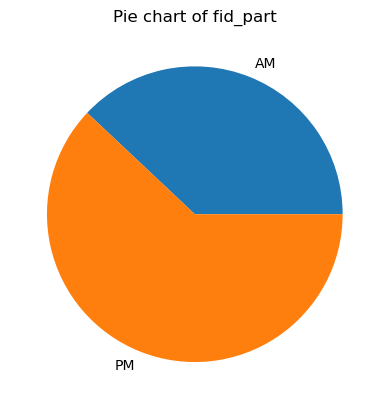

In [75]:
plt.pie(portions_fid['fid_part_vals'],labels=portions_fid['fid_part'])
plt.title("Pie chart of fid_part")
plt.show()

In [76]:
ds['rd_part'].value_counts()
rd_part_am=225228/(225228+145868)
rd_part_pm=145868/(225228+145868)

In [568]:
portions_rd= {'rd_part':['AM','PM'],'rd_part_vals':[rd_part_am,rd_part_pm]}
portions_rd

{'rd_part': ['AM', 'PM'],
 'rd_part_vals': [0.6069265095824261, 0.3930734904175739]}

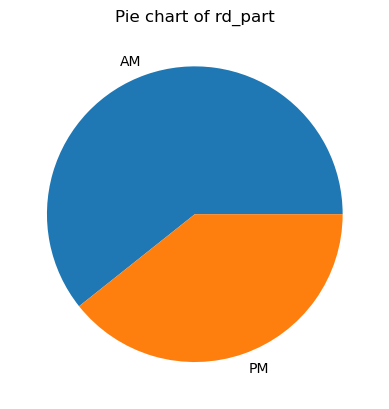

In [569]:
plt.pie(portions_rd['rd_part_vals'],labels=portions_rd['rd_part'])
plt.title("Pie chart of rd_part")
plt.show()

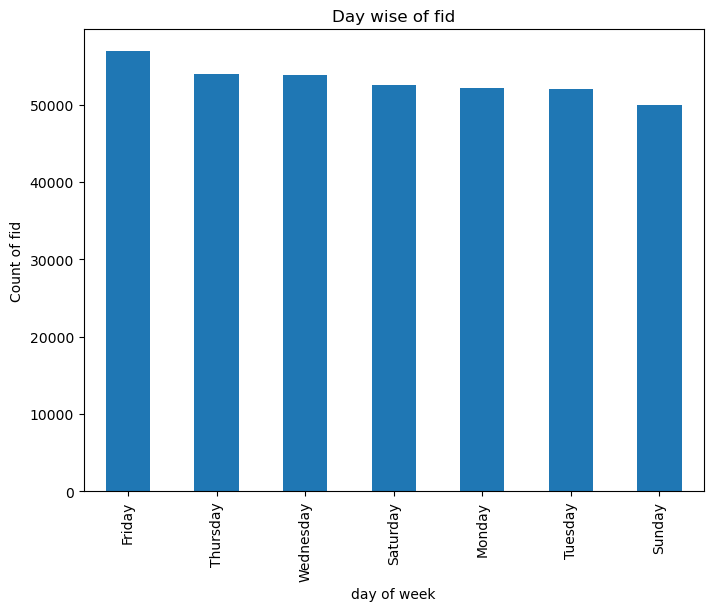

In [571]:
ds['fid_day'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Day wise of fid")
plt.xlabel("day of week")
plt.ylabel("Count of fid")
plt.show()

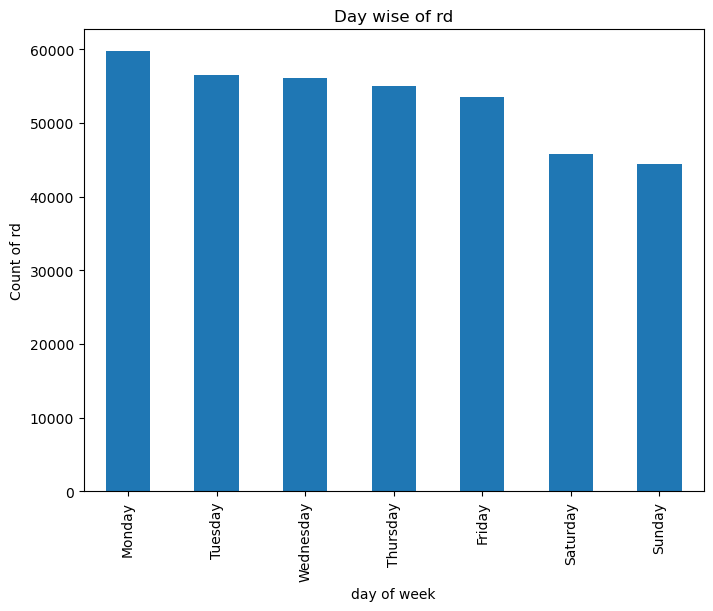

In [572]:
ds['rd_day'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Day wise of rd")
plt.xlabel("day of week")
plt.ylabel("Count of rd")
plt.show()

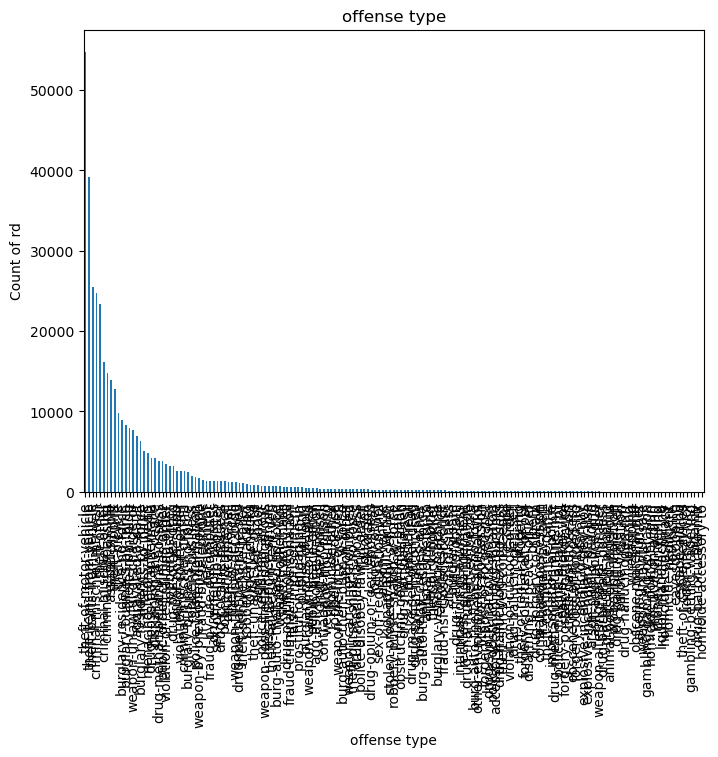

In [575]:
ds['offense_type_id'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="offense type")
plt.xlabel("offense type")
plt.ylabel("Count of rd")
plt.show()
#dropping offense type because it's too complicated to use (waste of time even to put on the map as there would be too many colors)

In [576]:
ds=ds.drop(['offense_type_id'],axis=1)

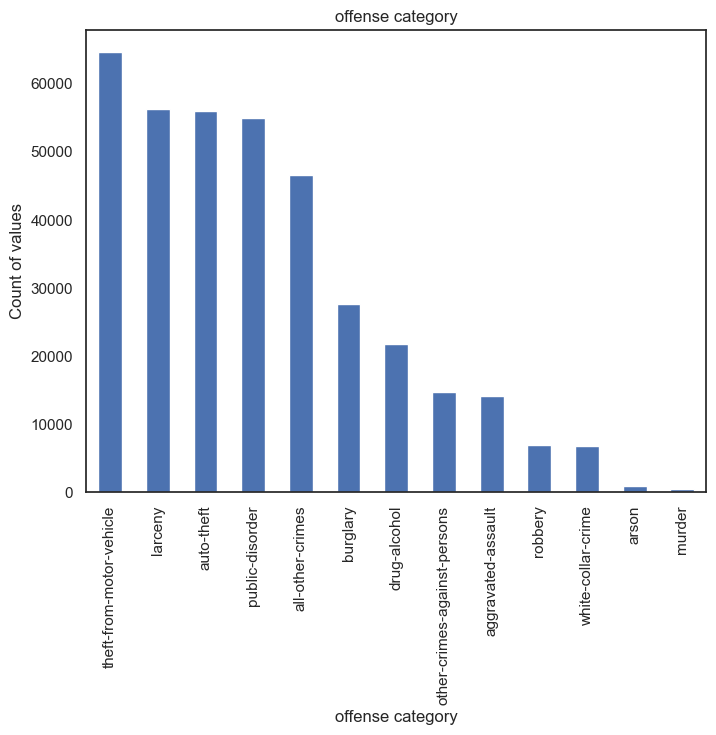

In [589]:
ds['offense_category_id'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="offense category")
plt.xlabel("offense category")
plt.ylabel("Count of values")
plt.show()

In [577]:
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_category_id,fid,fid_time,fid_part,fid_day,rd,rd_time,rd_part,rd_day,geo_x,geo_y,geo_lon,geo_lat,district_id,rd-fid
0,202268791,202268791299900,2999,0,public-disorder,2022-02-10,2:50:00,AM,Thursday,2022-02-10,3:16:00,AM,Thursday,3140929.0,1692612.0,-104.998910,39.733957,1,0 days
1,2021387586,2021387586299900,2999,0,public-disorder,2021-07-07,9:02:00,PM,Wednesday,2021-07-08,12:55:00,AM,Thursday,3142470.0,1697098.0,-104.993342,39.746248,6,1 days
2,2020641486,2020641486299900,2999,0,public-disorder,2020-10-29,1:30:00,AM,Thursday,2020-10-29,4:31:00,AM,Thursday,3133352.0,1710396.0,-105.025520,39.782888,1,0 days
3,2018612468,2018612468299900,2999,0,public-disorder,2018-09-06,5:00:00,PM,Thursday,2018-09-07,9:58:00,AM,Friday,3133534.0,1685797.0,-105.025330,39.715357,4,1 days
4,2020293614,2020293614299900,2999,0,public-disorder,2020-05-08,5:00:00,AM,Friday,2020-05-13,10:00:00,AM,Wednesday,3184065.0,1710782.0,-104.845074,39.783082,5,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2023534182,2023534182240400,2404,0,auto-theft,2023-10-03,11:30:00,AM,Tuesday,2023-10-03,5:40:00,PM,Tuesday,3171584.0,1684914.0,-104.890099,39.712310,3,0 days
386861,2023534279,2023534279260900,2609,0,white-collar-crime,2023-09-27,11:00:00,AM,Wednesday,2023-10-03,6:34:00,PM,Tuesday,3146000.0,1685678.0,-104.981021,39.714843,3,6 days
386862,2023533509,2023533509131506,1315,6,aggravated-assault,2023-10-03,10:44:00,AM,Tuesday,2023-10-03,12:03:00,PM,Tuesday,3179460.0,1715407.0,-104.861343,39.795869,5,0 days
386863,2023533048,2023533048131506,1315,6,aggravated-assault,2023-10-03,5:30:00,AM,Tuesday,2023-10-03,9:47:00,AM,Tuesday,3173405.0,1682706.0,-104.883680,39.706214,3,0 days


In [600]:
ds.offense_category_id

theft-from-motor-vehicle        64609
larceny                         56197
auto-theft                      55902
public-disorder                 54876
all-other-crimes                46497
burglary                        27644
drug-alcohol                    21784
other-crimes-against-persons    14622
aggravated-assault              14056
robbery                          6965
white-collar-crime               6704
arson                             829
murder                            411
Name: offense_category_id, dtype: int64

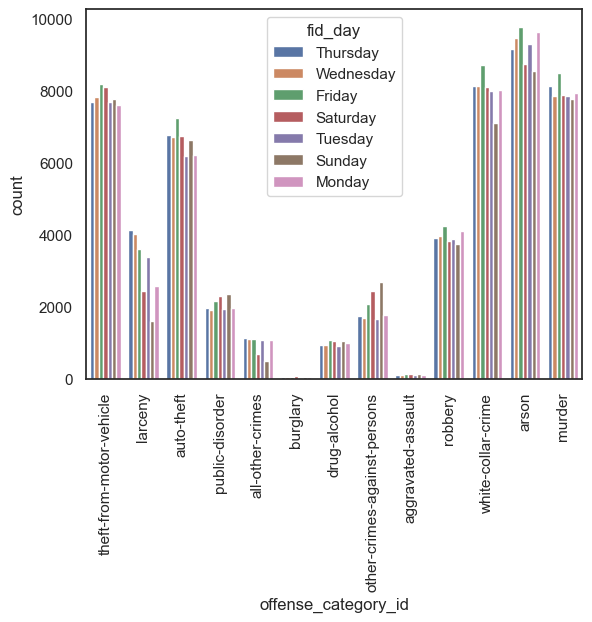

In [615]:
sns.countplot(x='offense_category_id', data=ds, hue='fid_day').set_xticklabels(labels=['theft-from-motor-vehicle','larceny','auto-theft','public-disorder','all-other-crimes','burglary','drug-alcohol','other-crimes-against-persons','aggravated-assault','robbery','white-collar-crime','arson','murder'],rotation=90)
plt.show()

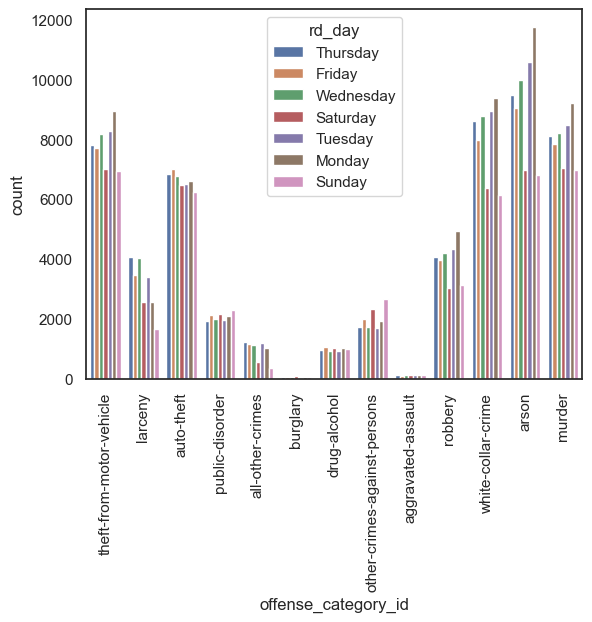

In [616]:
sns.countplot(x='offense_category_id', data=ds, hue='rd_day').set_xticklabels(labels=['theft-from-motor-vehicle','larceny','auto-theft','public-disorder','all-other-crimes','burglary','drug-alcohol','other-crimes-against-persons','aggravated-assault','robbery','white-collar-crime','arson','murder'],rotation=90)
plt.show()

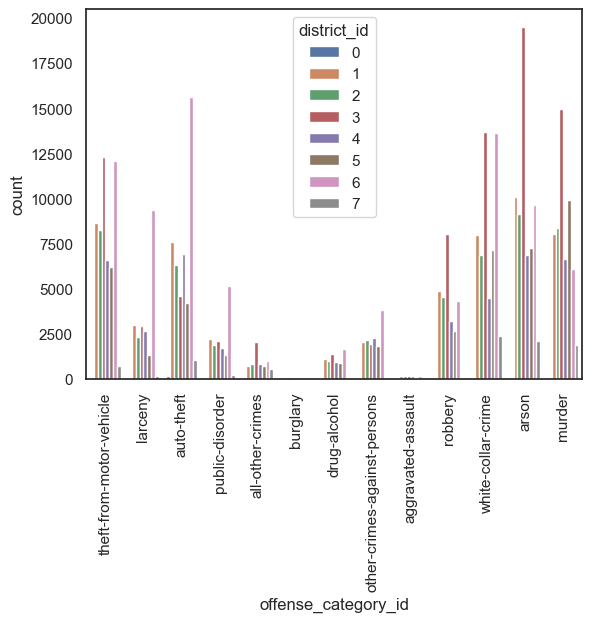

In [637]:
sns.countplot(x='offense_category_id', data=ds, hue='district_id').set_xticklabels(labels=['theft-from-motor-vehicle','larceny','auto-theft','public-disorder','all-other-crimes','burglary','drug-alcohol','other-crimes-against-persons','aggravated-assault','robbery','white-collar-crime','arson','murder'],rotation=90)
plt.show()

In [77]:
crime_ds=ds[ds.offense_code_extension != 0]

In [78]:
ds

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,fid,fid_time,fid_part,fid_day,rd,rd_time,rd_part,rd_day,geo_x,geo_y,geo_lon,geo_lat,district_id,rd-fid
0,2.022688e+08,2.022690e+14,2999,0,criminal-mischief-other,public-disorder,2022-02-10,02:50:00,AM,Thursday,2022-02-10,03:16:00,AM,Thursday,3140929.0,1692612.0,-104.998910,39.733957,1,0 days
1,2.021388e+09,2.021390e+15,2999,0,criminal-mischief-other,public-disorder,2021-07-07,21:02:00,PM,Wednesday,2021-07-08,00:55:00,AM,Thursday,3142470.0,1697098.0,-104.993342,39.746248,6,1 days
2,2.020641e+09,2.020640e+15,2999,0,criminal-mischief-other,public-disorder,2020-10-29,01:30:00,AM,Thursday,2020-10-29,04:31:00,AM,Thursday,3133352.0,1710396.0,-105.025520,39.782888,1,0 days
3,2.018612e+09,2.018610e+15,2999,0,criminal-mischief-other,public-disorder,2018-09-06,17:00:00,PM,Thursday,2018-09-07,09:58:00,AM,Friday,3133534.0,1685797.0,-105.025330,39.715357,4,1 days
4,2.020294e+09,2.020290e+15,2999,0,criminal-mischief-other,public-disorder,2020-05-08,05:00:00,AM,Friday,2020-05-13,10:00:00,AM,Wednesday,3184065.0,1710782.0,-104.845074,39.783082,5,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2.023534e+09,2.023530e+15,2404,0,theft-of-motor-vehicle,auto-theft,2023-10-03,11:30:00,AM,Tuesday,2023-10-03,17:40:00,PM,Tuesday,3171584.0,1684914.0,-104.890099,39.712310,3,0 days
386861,2.023534e+09,2.023530e+15,2609,0,fraud-by-use-of-computer,white-collar-crime,2023-09-27,11:00:00,AM,Wednesday,2023-10-03,18:34:00,PM,Tuesday,3146000.0,1685678.0,-104.981021,39.714843,3,6 days
386862,2.023534e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,10:44:00,AM,Tuesday,2023-10-03,12:03:00,PM,Tuesday,3179460.0,1715407.0,-104.861343,39.795869,5,0 days
386863,2.023533e+09,2.023530e+15,1315,6,agg-aslt-shoot,aggravated-assault,2023-10-03,05:30:00,AM,Tuesday,2023-10-03,09:47:00,AM,Tuesday,3173405.0,1682706.0,-104.883680,39.706214,3,0 days


In [79]:
crime_ds.offense_category_id.value_counts()

public-disorder                 27260
larceny                         10983
all-other-crimes                 9248
aggravated-assault               7088
white-collar-crime               1422
burglary                         1236
auto-theft                       1119
other-crimes-against-persons      711
drug-alcohol                      290
Name: offense_category_id, dtype: int64

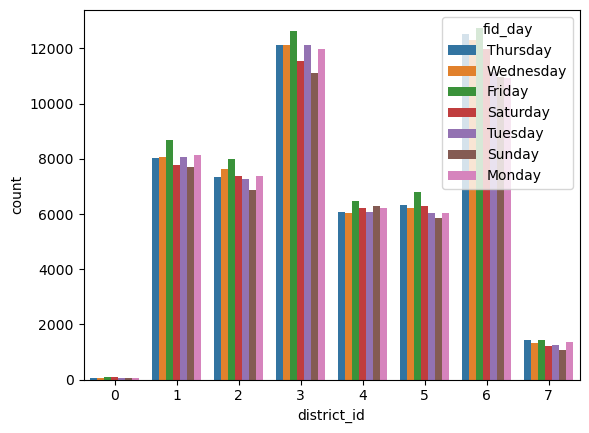

In [80]:
sns.countplot(x='district_id', data=ds, hue='fid_day')
plt.show()

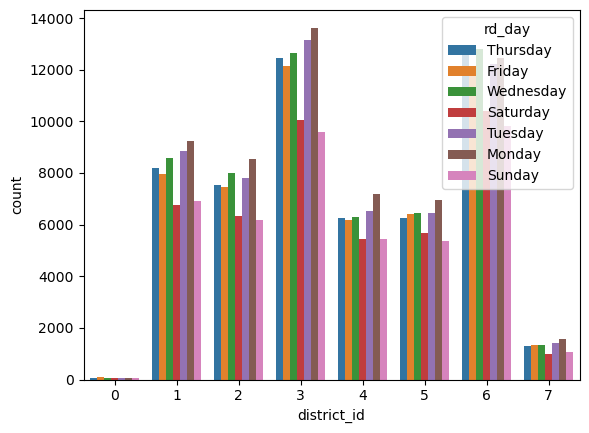

In [81]:
sns.countplot(x='district_id', data=ds, hue='rd_day')
plt.show()

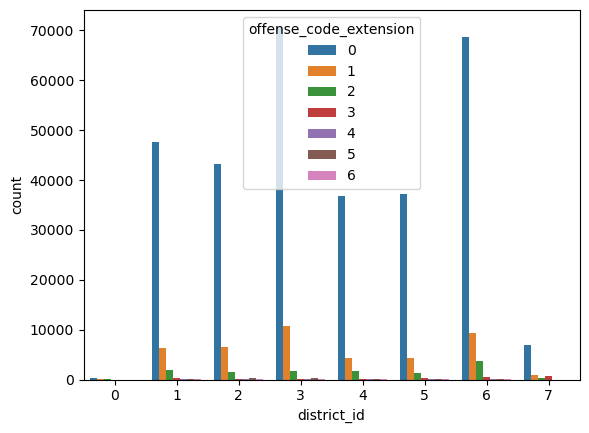

In [83]:
sns.countplot(x='district_id', data=ds, hue='offense_code_extension')
plt.show()

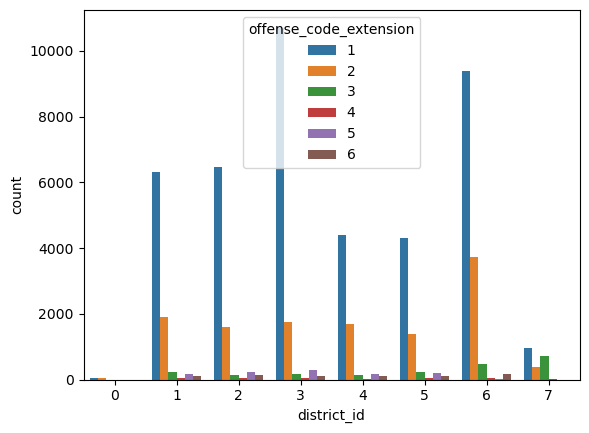

In [84]:
sns.countplot(x='district_id', data=crime_ds, hue='offense_code_extension')
plt.show()

In [85]:
ds.offense_code.value_counts()
ds.offense_code_extension.value_counts()
#dropping offense code as it is too much of a hassle

0    311739
1     42642
2     12473
3      2124
5      1086
6       760
4       272
Name: offense_code_extension, dtype: int64

In [86]:
ds=ds.drop(['offense_code'],axis=1)

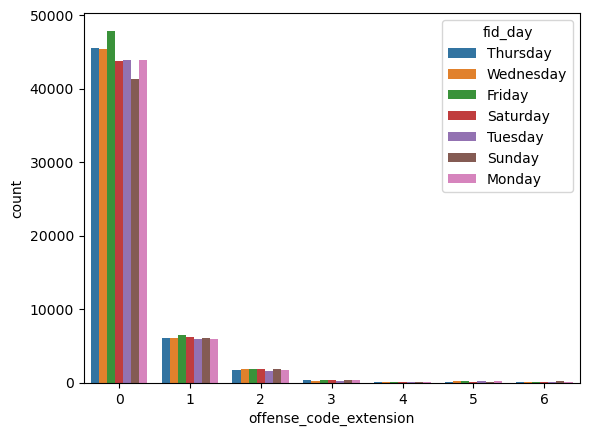

In [87]:
sns.countplot(x='offense_code_extension', data=ds, hue='fid_day')
plt.show()

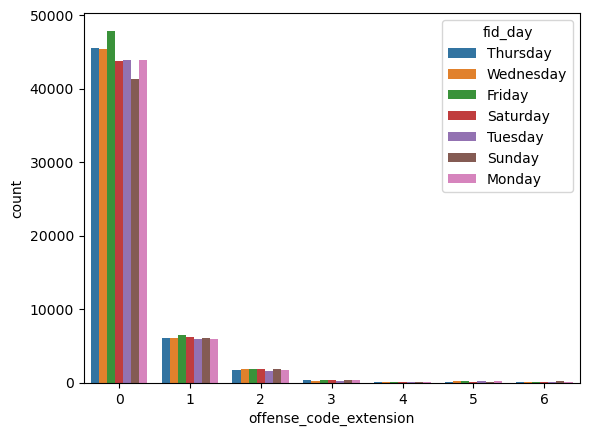

In [88]:
sns.countplot(x='offense_code_extension', data=ds, hue='fid_day')
plt.show()

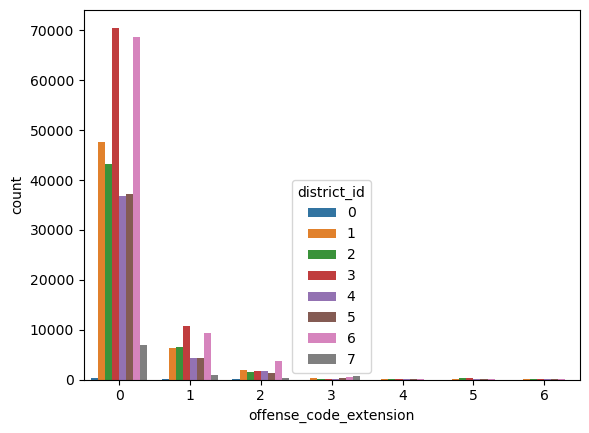

In [89]:
sns.countplot(x='offense_code_extension', data=ds, hue='district_id')
plt.show()

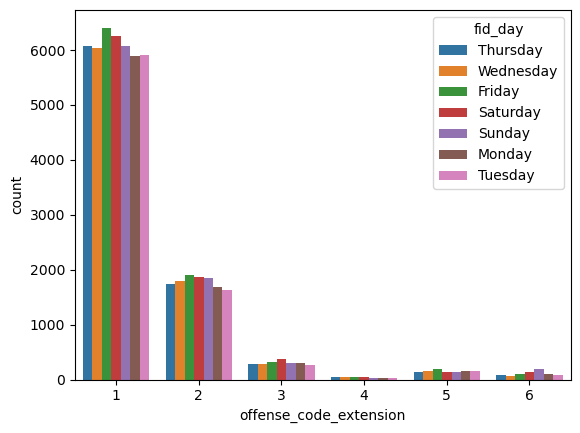

In [90]:
sns.countplot(x='offense_code_extension', data=ds[-(ds.offense_code_extension == 0)], hue='fid_day')
plt.show()

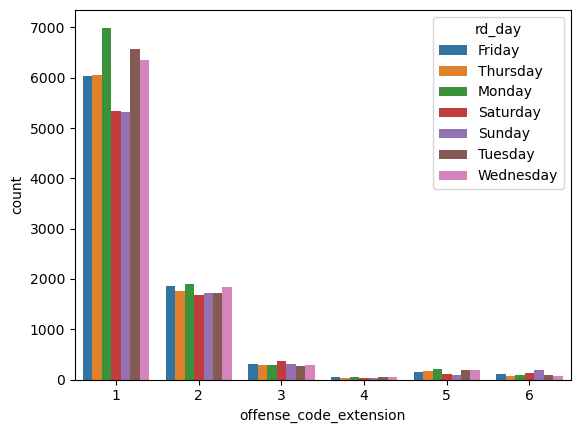

In [91]:
sns.countplot(x='offense_code_extension', data=ds[-(ds.offense_code_extension == 0)], hue='rd_day')
plt.show()

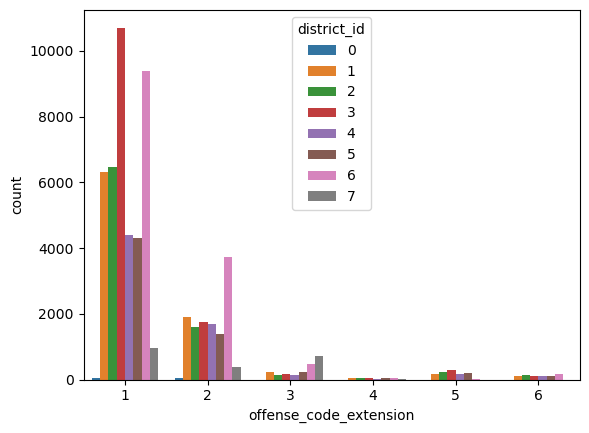

In [92]:
sns.countplot(x='offense_code_extension', data=ds[-(ds.offense_code_extension == 0)], hue='district_id')
plt.show()

In [93]:
ds.describe()

,incident_id,offense_id,offense_code_extension,geo_x,geo_y,geo_lon,geo_lat,district_id,rd-fid
count,3.710960e+05,3.710960e+05,371096.000000,3.710960e+05,3.710960e+05,3.710960e+05,371096.000000,371096.000000,371096
mean,6.312240e+09,6.312237e+15,0.229154,3.157515e+06,1.693963e+06,-1.049429e+02,39.730607,3.669166,4 days 12:25:04.274904606
std,1.275594e+10,1.275593e+16,0.637943,3.853012e+05,9.561615e+04,1.078909e+00,0.409652,1.814902,31 days 00:27:06.763243175
min,2.019600e+04,2.019652e+10,0.000000,1.000000e+00,1.110000e+02,-1.154641e+02,0.000000,0.000000,0 days 00:00:00
25%,2.019379e+09,2.019380e+15,0.000000,3.140207e+06,1.683469e+06,-1.050014e+02,39.708748,2.000000,0 days 00:00:00
50%,2.021510e+09,2.021510e+15,0.000000,3.146509e+06,1.694853e+06,-1.049790e+02,39.739995,3.000000,0 days 00:00:00
75%,2.023502e+09,2.023500e+15,0.000000,3.165779e+06,1.702456e+06,-1.049110e+02,39.760928,5.000000,1 days 00:00:00
max,2.020890e+12,2.020890e+18,6.000000,4.067477e+07,1.089045e+07,5.000000e-07,39.900961,7.000000,1844 days 00:00:00


In [105]:
sns.pairplot(ds['incident_id', 'offense_id', 'offense_code_extension',
        'offense_category_id', 'geo_x', 'geo_y',
       'geo_lon', 'geo_lat', 'district_id', 'rd-fid'])

KeyError: ('incident_id', 'offense_id', 'offense_code_extension', 'offense_category_id', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'rd-fid')

In [95]:
ds.columns

Index(['incident_id', 'offense_id', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'fid', 'fid_time', 'fid_part',
       'fid_day', 'rd', 'rd_time', 'rd_part', 'rd_day', 'geo_x', 'geo_y',
       'geo_lon', 'geo_lat', 'district_id', 'rd-fid'],
      dtype='object')

In [99]:
corr=ds[['incident_id', 'offense_id', 'offense_code_extension',
        'offense_category_id', 'geo_x', 'geo_y',
       'geo_lon', 'geo_lat', 'district_id', 'rd-fid']].corr()
corr

,incident_id,offense_id,offense_code_extension,geo_x,geo_y,geo_lon,geo_lat,district_id
incident_id,1.000000,1.000000,0.036323,0.005041,0.007524,0.006403,0.004606,0.031945
offense_id,1.000000,1.000000,0.036323,0.005041,0.007523,0.006403,0.004606,0.031945
offense_code_extension,0.036323,0.036323,1.000000,0.001354,0.005134,0.001724,0.003223,0.019754
geo_x,0.005041,0.005041,0.001354,1.000000,0.988746,0.999873,-0.989791,0.012155
geo_y,0.007524,0.007523,0.005134,0.988746,1.000000,0.988911,-0.962731,0.026221
geo_lon,0.006403,0.006403,0.001724,0.999873,0.988911,1.000000,-0.987968,0.016736
geo_lat,0.004606,0.004606,0.003223,-0.989791,-0.962731,-0.987968,1.000000,0.023832
district_id,0.031945,0.031945,0.019754,0.012155,0.026221,0.016736,0.023832,1.000000


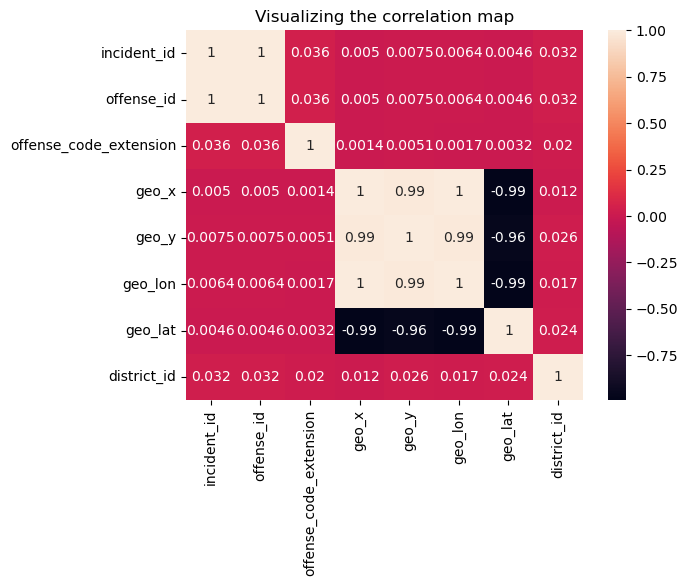

In [103]:
sns.heatmap(ds[['incident_id', 'offense_id', 'offense_code_extension',
        'offense_category_id', 'geo_x', 'geo_y',
       'geo_lon', 'geo_lat', 'district_id', 'rd-fid']].corr(),annot=True)
plt.title("Visualizing the correlation map")
plt.show()